<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1212_toyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from sklearn.neural_network import MLPClassifier
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras

# fashion mnist 조지기
- 데이터 다운
- 이미지와 라벨 클래스 확인
- 학습데이터/ 테스트데이터 분리
- 데이터 증가
  - 회전
  - 줌인
  - 이동
- 학습, 성능 테스트
  - 모델 선택
- 틀린 샘플 확인

# 기본
- SGDClassifier = (0.8301492537313433, 0.7683333333333333)
- MLPClassifier = (0.883955223880597, 0.8163636363636364)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape # 트레인 6만개, 테스트 1만개

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

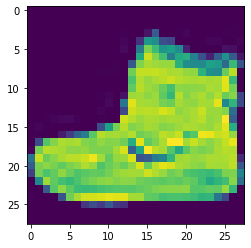

In [ ]:
plt.imshow(train_images[0])

In [ ]:
Image.fromarray(train_images[0]).size # 28 * 28 사이즈

(28, 28)

1. 기본, 데이터 증가 .. 이런 식으로 진행
2. x_train 을 사진으로 변환후 다시 리스트로 변환후 진행 (데이터 증가시 편함)
3. 

In [ ]:
# 트레인 데이터 생성

listx = []
a = 0
for i in train_images[:20000]:
  img = Image.fromarray(i)
  img = np.array(img)
  listx.append(img)

listx = np.array(listx).reshape(-1,28*28)
listy = train_labels[:20000]

In [ ]:
listx.shape, listy.shape

((20000, 784), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listx, listy, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 784), (6600, 784), (13400,), (6600,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train)

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.883955223880597, 0.8163636363636364)

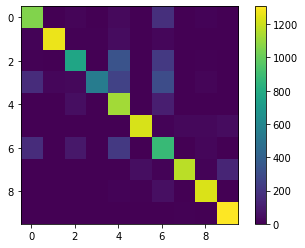

In [ ]:
np.set_printoptions(threshold=10000)
cm = confusion_matrix(y_train, model.predict(X_train))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
plt.imshow(cm)
plt.colorbar() #class6 오류 많음

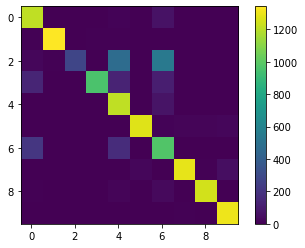

In [ ]:
plt.imshow(cm)
plt.colorbar() #class6 오류 많음

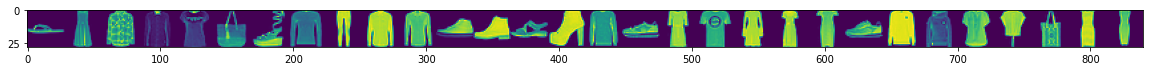

In [ ]:
sampleimg = train_images[30:60]
sampleimg.shape

sampleimg = sampleimg.transpose(1,0,2).reshape(28,30*28)
plt.figure(figsize = (20,20))
plt.imshow(sampleimg)

# 이미지 회전 (20도)
- SDG = (0.8623134328358208, 0.7971212121212121)
- MLP = (0.889179104477612, 0.8227272727272728)


In [ ]:
X = []
for i in listx:
  img = Image.fromarray(i.reshape(28,28))
  img_rot = img.rotate(20)
  img_rot = np.array(img_rot)
  X.append(img_rot)
X = np.array(X).reshape(-1,28*28)

In [ ]:
X.shape

(20000, 784)

In [ ]:
img = Image.fromarray(listx[0].reshape(28,28))
img_rot = img.rotate(20)
img_rot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 784), (6600, 784), (13400,), (6600,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train)

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.889179104477612, 0.8227272727272728)

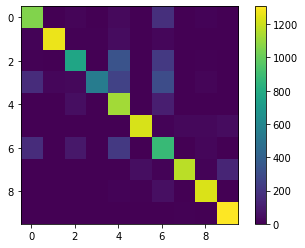

In [ ]:
np.set_printoptions(threshold=10000)
cm = confusion_matrix(y_train, model.predict(X_train))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
plt.imshow(cm)
plt.colorbar() #class6 오류 많음

# 이미지 축소 28X28 -> 14X14
- SGD = (0.79, 0.7733333333333333)
- MLP = (0.9177611940298508, 0.8503030303030303)


In [ ]:
X = []
for i in listx:
  img = Image.fromarray(i.reshape(28,28))
  img_rot = img.resize((14,14))
  img_rot = np.array(img_rot)
  X.append(img_rot)

X = np.array(X).reshape(-1,14*14)

In [ ]:
X.shape

(20000, 196)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 196), (6600, 196), (13400,), (6600,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train)

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9166417910447762, 0.8406060606060606)

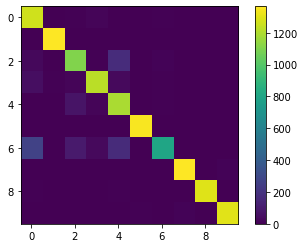

In [ ]:
np.set_printoptions(threshold=10000)
cm = confusion_matrix(y_train, model.predict(X_train))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
plt.imshow(cm)
plt.colorbar() #class6 오류 많음

# 합치기
- 기본 + 회전 = (0.8773507462686567, 0.8295454545454546) 
- 기본 + 축소 = (0.9325746268656716, 0.8404545454545455)
- 회전 + 축소 = (0.9127611940298508, 0.8354545454545454)
- 기본 + 회전 + 축소 = (0.8972636815920398, 0.8269191919191919)

기본 + 회전 

In [ ]:
# 트레인 데이터 생성

listx = []
a = 0
for i in train_images[:20000]:
  img = Image.fromarray(i) #기본 시작
  img = np.array(img)
  listx.append(img) #기본 끝

for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28)) # 회전시작
  img_rot = img.rotate(20)
  img_rot = np.array(img_rot) # 회전끝
  listx.append(img_rot)

listx = np.array(listx).reshape(-1,28*28)
listy = train_labels[:20000]

In [ ]:
listy = np.concatenate((listy,listy),axis=0)
listx.shape, listy.shape

((20000, 784), (20000, 28, 28), (40000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listx, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26800, 784), (13200, 784), (26800,), (13200,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train) ####

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.8773507462686567, 0.8295454545454546)

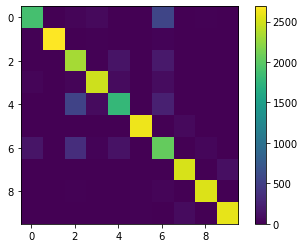

In [ ]:
np.set_printoptions(threshold=10000)
cm = confusion_matrix(y_train, model.predict(X_train))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
plt.imshow(cm)
plt.colorbar() 

기본 + 축소

In [ ]:
# 트레인 데이터 생성

listx = []
listxx = []
a = 0
for i in train_images[:20000]:
  img = Image.fromarray(i) #기본 시작
  img = np.array(img)
  listx.append(img) #기본 끝

for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28))
  img_rot = img.resize((14,14))
  img_rot = np.array(img_rot)
  bg = np.zeros(img.size, np.uint8)#까만 배경
  bg[14:28, 14:28] = np.array(img_rot)
  listxx.append(bg)

listx = np.array(listx).reshape(-1,28*28)
listxx = np.array(listxx).reshape(-1,28*28)
listy = train_labels[:20000]

In [ ]:
listy = np.concatenate((listy,listy),axis=0)
listx = np.concatenate((listx,listxx),axis=0)

listx.shape, listxx.shape, listy.shape

((40000, 784), (20000, 784), (40000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listx, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26800, 784), (13200, 784), (26800,), (13200,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9325746268656716, 0.8404545454545455)

회전 + 축소

In [ ]:
# 트레인 데이터 생성

listx = []
listxx = []
a = 0

for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28)) # 회전시작
  img_rot = img.rotate(20)
  img_rot = np.array(img_rot) # 회전끝
  listx.append(img_rot)

for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28)) #축소시작
  img_rot = img.resize((14,14))
  img_rot = np.array(img_rot)
  bg = np.zeros(img.size, np.uint8)#까만 배경
  bg[14:28, 14:28] = np.array(img_rot)
  listx.append(bg) #축소 끝

listx = np.array(listx).reshape(-1,28*28)
listy = train_labels[:20000]

In [ ]:
listy = np.concatenate((listy, listy, listy), axis=0)
listx.shape, listy.shape

((40000, 784), (120000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listx, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26800, 784), (13200, 784), (26800,), (13200,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train) 

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9127611940298508, 0.8354545454545454)

기본 + 회전 + 축소

In [ ]:
# 트레인 데이터 생성

listx = []
listxx = []
a = 0

for i in train_images[:20000]:
  img = Image.fromarray(i) #기본 시작
  img = np.array(img)
  listx.append(img) #기본 끝
  
for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28)) # 회전시작
  img_rot = img.rotate(20)
  img_rot = np.array(img_rot) # 회전끝
  listx.append(img_rot)

for i in train_images[:20000]:
  img = Image.fromarray(i.reshape(28,28)) #축소시작
  img_rot = img.resize((14,14))
  img_rot = np.array(img_rot)
  bg = np.zeros(img.size, np.uint8)#까만 배경
  bg[14:28, 14:28] = np.array(img_rot)
  listx.append(bg) #축소 끝

listx = np.array(listx).reshape(-1,28*28)
listy = train_labels[:20000]

In [ ]:
listy = np.concatenate((listy, listy, listy), axis=0)
listx.shape, listy.shape

((60000, 784), (60000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listx, listy, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40200, 784), (19800, 784), (40200,), (19800,))

In [ ]:
model = MLPClassifier().fit(X_train, y_train) 

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8972636815920398, 0.8269191919191919)